<a href="https://colab.research.google.com/github/devansh391k/COVID-19-ANALYSIS-DATA-SCIENCE-PROJECT-/blob/main/COVID19_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING DATASET AND ANALYSIS**

In [10]:
import pandas as pd
import numpy as np

# Load and parse dates
df = pd.read_csv("DATA COVID 19.csv", parse_dates=['date'])

# Drop columns with >95% missing
missing_percent = df.isnull().mean()
df_cleaned = df.drop(columns=missing_percent[missing_percent > 0.95].index)

# Fill missing numeric values with forward fill
df_cleaned = df_cleaned.fillna(method='ffill')

# Drop rows with remaining NaNs
df_cleaned = df_cleaned.dropna()

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.info()


/tmp/ipython-input-3876239837.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490094 entries, 0 to 490093
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   country                                     490094 non-null  object        
 1   date                                        490094 non-null  datetime64[ns]
 2   total_cases                                 490094 non-null  float64       
 3   new_cases                                   490094 non-null  float64       
 4   new_cases_smoothed                          490094 non-null  float64       
 5   total_cases_per_million                     490094 non-null  float64       
 6   new_cases_per_million                       490094 non-null  float64       
 7   new_cases_smoothed_per_million              490094 non-null  float64       
 8   total_deaths                                490094 non-null  float64      

In [11]:
import matplotlib.pyplot as plt

# Univariate statistics for 'total_cases'
univariate_stats = df_cleaned['total_cases'].describe()
skewness = df_cleaned['total_cases'].skew()
kurtosis = df_cleaned['total_cases'].kurt()

# Print stats in console (optional)
print("Univariate Statistics for 'total_cases':")
print(univariate_stats)
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


Univariate Statistics for 'total_cases':
count    4.900940e+05
mean     1.306547e+07
std      7.223130e+07
min      0.000000e+00
25%      9.518000e+03
50%      8.862700e+04
75%      1.047489e+06
max      7.783446e+08
Name: total_cases, dtype: float64

Skewness: 7.79
Kurtosis: 64.70


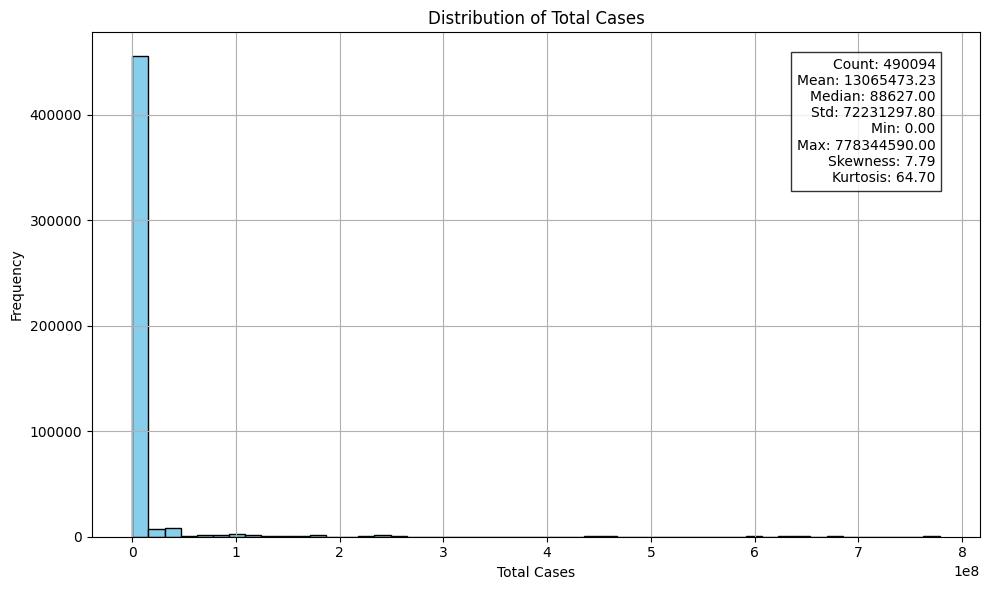

In [12]:
# Plot Histogram with text box showing stats
plt.figure(figsize=(10, 6))
df_cleaned['total_cases'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

# Stats box text
stats_text = (
    f"Count: {univariate_stats['count']:.0f}\n"
    f"Mean: {univariate_stats['mean']:.2f}\n"
    f"Median: {df_cleaned['total_cases'].median():.2f}\n"
    f"Std: {univariate_stats['std']:.2f}\n"
    f"Min: {univariate_stats['min']:.2f}\n"
    f"Max: {univariate_stats['max']:.2f}\n"
    f"Skewness: {skewness:.2f}\n"
    f"Kurtosis: {kurtosis:.2f}"
)

# Place stats on the plot
plt.gca().text(
    0.95, 0.95, stats_text,
    transform=plt.gca().transAxes,
    fontsize=10, verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

#**BIVARIATE ANALYSIS**


# **Scatter Plot: Total Cases vs Total Deaths with Correlation**

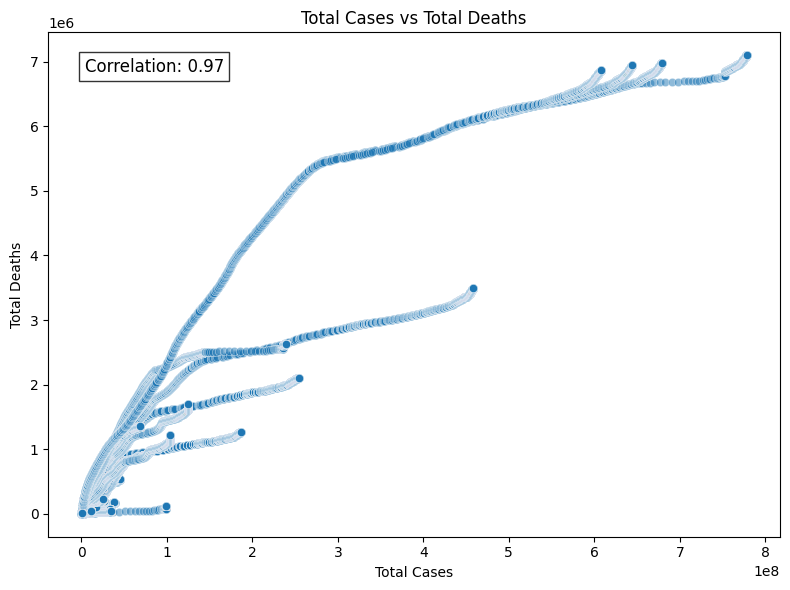

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr = df_cleaned['total_cases'].corr(df_cleaned['total_deaths'])

# Scatter plot with correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='total_cases', y='total_deaths', alpha=0.5)
plt.title('Total Cases vs Total Deaths')

# Add correlation value as text
plt.gca().text(
    0.05, 0.95,
    f"Correlation: {corr:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()


# **Box Plot: New Cases by Continent with Summary Stats**

Summary of 'new_cases' by Continent:
                  count          mean            std  min  25%  50%    75%  \
continent                                                                    
Africa         125784.0  25696.989132  198039.414990  0.0  0.0  0.0   28.0   
Asia            98422.0   3063.489840   62741.173544  0.0  0.0  0.0  221.0   
Europe         107729.0   3242.916262   29348.241225  0.0  0.0  0.0  210.0   
North America   82983.0   9899.834050  112868.590607  0.0  0.0  0.0   13.0   
Oceania         48673.0   2866.728371   28686.068516  0.0  0.0  0.0    0.0   
South America   26503.0   2226.264008   10032.911275  0.0  0.0  0.0  419.0   

                     max  
continent                 
Africa         8401906.0  
Asia           6966046.0  
Europe         2417043.0  
North America  7197333.0  
Oceania        1410856.0  
South America   298408.0  


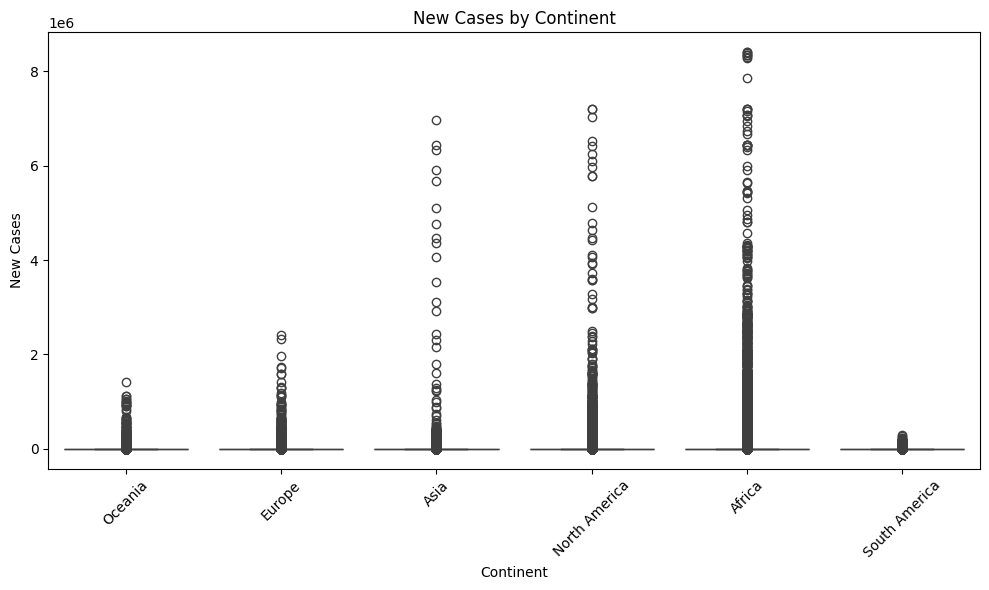

In [14]:
# Calculate group-wise stats
continent_stats = df_cleaned.groupby('continent')['new_cases'].describe()

# Display boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='continent', y='new_cases')
plt.xticks(rotation=45)
plt.title('New Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('New Cases')

# Optional: print the group-wise summary to console
print("Summary of 'new_cases' by Continent:")
print(continent_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

plt.tight_layout()
plt.show()


#**MULTIVARIATE ANALYSIS**

# **Multivariate Correlation Heatmap**

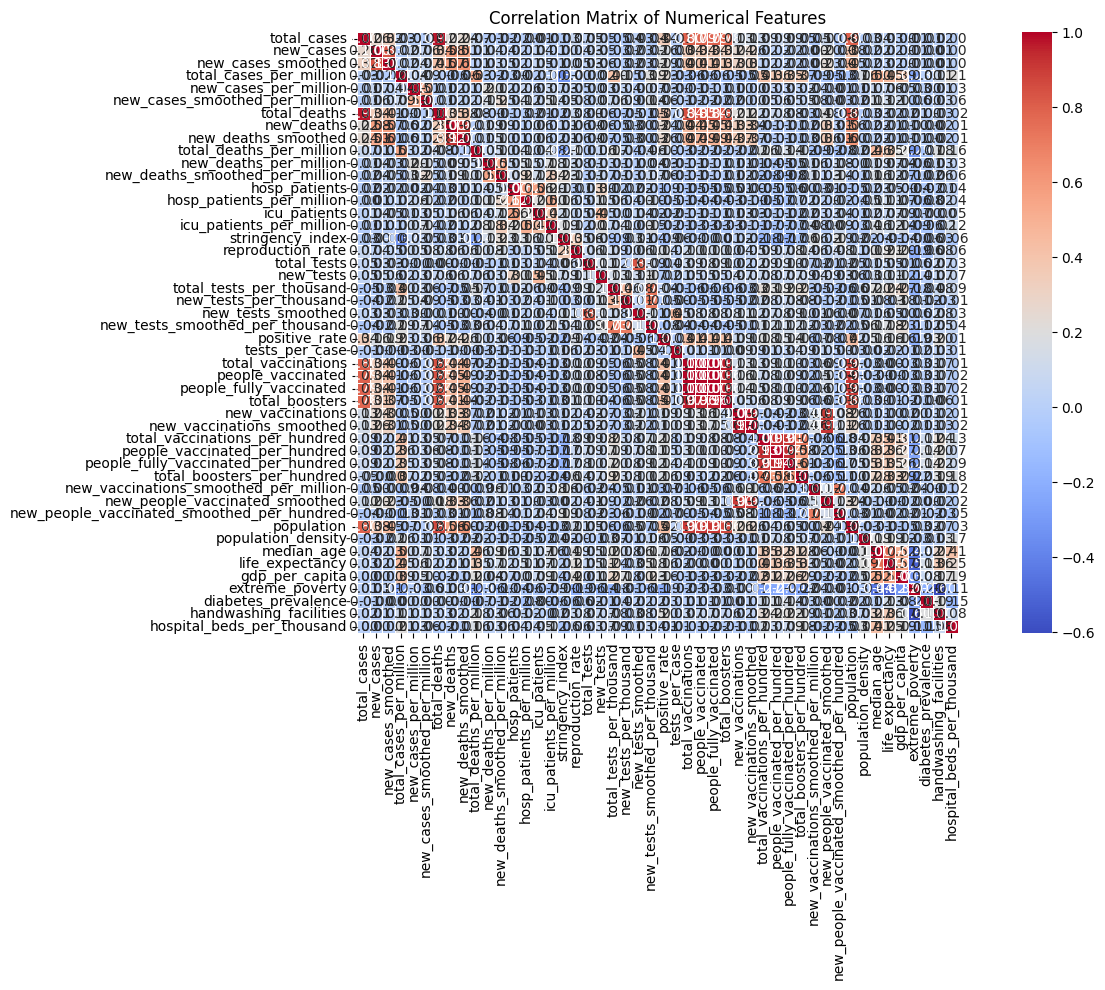

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df_cleaned.corr(numeric_only=True)

# Plot full heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


# **Extract & Display Top Correlated Pairs**

In [16]:
# Unstack and sort correlation pairs (remove self-correlation)
corr_pairs = corr_matrix.unstack().sort_values(key=lambda x: abs(x), ascending=False)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicates (e.g., (a,b) and (b,a))
seen = set()
unique_pairs = []
for i in range(0, len(corr_pairs), 2):
    pair = corr_pairs.index[i]
    if pair not in seen and (pair[1], pair[0]) not in seen:
        seen.add(pair)
        unique_pairs.append((pair[0], pair[1], corr_pairs[pair]))

# Create DataFrame
top_corr_df = pd.DataFrame(unique_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
top_corr_df = top_corr_df.iloc[:10]  # Top 10 pairs

# Display table
print("Top 10 Correlated Feature Pairs:")
print(top_corr_df)


Top 10 Correlated Feature Pairs:
                        Feature 1                            Feature 2  \
0         people_fully_vaccinated                    people_vaccinated   
1              total_vaccinations              people_fully_vaccinated   
2               people_vaccinated                   total_vaccinations   
3                     total_cases                         total_deaths   
4       new_vaccinations_smoothed                     new_vaccinations   
5                  total_boosters                   total_vaccinations   
6         people_fully_vaccinated                       total_boosters   
7               people_vaccinated                       total_boosters   
8   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred   
9  total_vaccinations_per_hundred        people_vaccinated_per_hundred   

   Correlation  
0     0.999560  
1     0.998931  
2     0.998531  
3     0.972282  
4     0.971082  
5     0.966467  
6     0.962781  
7     0.960331  

# **OUTLIER DETECTION**

Number of outliers in 'total_cases': 79766
Outliers as percentage of total: 16.28%


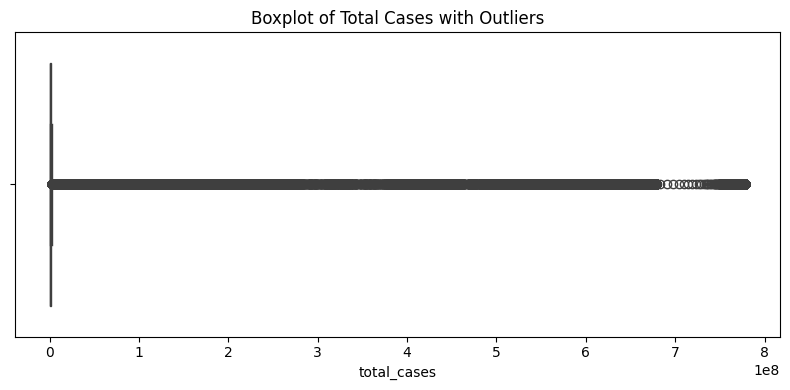

In [17]:
# Calculate outliers
Q1 = df_cleaned['total_cases'].quantile(0.25)
Q3 = df_cleaned['total_cases'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['total_cases'] < Q1 - 1.5 * IQR) |
                      (df_cleaned['total_cases'] > Q3 + 1.5 * IQR)]

# Print summary
print(f"Number of outliers in 'total_cases': {len(outliers)}")
print(f"Outliers as percentage of total: {100 * len(outliers)/len(df_cleaned):.2f}%")

# Visualize with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['total_cases'])
plt.title('Boxplot of Total Cases with Outliers')
plt.tight_layout()
plt.show()


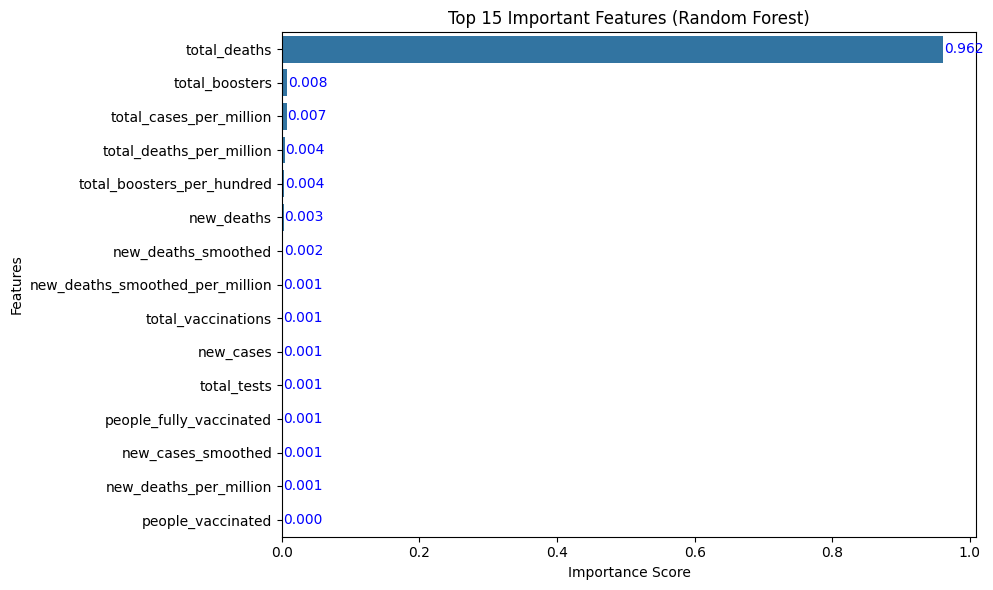

In [18]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Work on numeric data
df_rf = df_cleaned.select_dtypes(include='number')

# Fill missing numeric values with median (safer than mean for skewed data)
df_rf = df_rf.fillna(df_rf.median())

# Use a sample for faster execution
df_rf_sample = df_rf.sample(n=5000, random_state=42)  # sample 5000 rows

# Define features and target
X = df_rf_sample.drop(columns=['total_cases'])
y = df_rf_sample['total_cases']

# Train Random Forest with optimized settings for speed
model = RandomForestRegressor(
    n_estimators=50,    # fewer trees
    max_depth=10,       # limit depth
    random_state=42,
    n_jobs=-1           # use all CPU cores
)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Top N features
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:top_n], y=feature_importance.index[:top_n])
plt.title(f'Top {top_n} Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Add values to bars
for i, v in enumerate(feature_importance[:top_n]):
    plt.text(v + 0.001, i, f"{v:.3f}", color='blue', va='center')

plt.tight_layout()
plt.show()
